In [16]:
import requests
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['SF_BACKEND'] = 'tensorflow'
import click
import multiprocessing
from multiprocessing import freeze_support
sys.path.insert(0, '/mnt/data/PROJECTS/SALIVARY_GLAND/slideflow/')
import slideflow as sf
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [ ]:
sf.model.list_extractors()

[12:07:54] INFO     Loading from cache                                                                             
                    /mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/retccl_activations.pkl
                    ...

[12:07:59] INFO     Loaded coordinates from                                                                        
                    /mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/slidemap.parquet

Thu Apr 13 12:08:16 2023 Building and compiling search function


[12:08:18] INFO     Loaded UMAP from                                                                               
                    /mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/umap.pkl

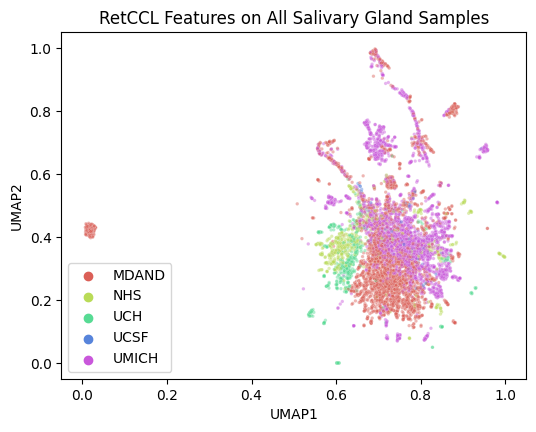

In [22]:
# UMAP Visualization Improvements/Modifications

acc_data = sf.Dataset(
    config='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/datasets.json',
    sources=['UMICH_ACC', 'UCSF_ACC', 'DFCI_ACC', 'NHS_ACC_1',
            'NHS_ACC_2', 'MD_ANDERSON_1', 'MD_ANDERSON_2', 'UCH_ACC'],
    annotations='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/salivary_gland_database.csv',
    tile_px=299, tile_um=302)

features = sf.DatasetFeatures(model='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc', 
                                dataset=acc_data,
                                cache='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/retccl_activations.pkl')
slidemap = sf.SlideMap.load('/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/slidemap.parquet')

slidemap.load_umap('/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/umap.pkl')
labels, _ = acc_data.labels('site', format='name')
slidemap.label_by_slide(labels)
slidemap.plot(subsample=7000, xlabel='UMAP1',
            ylabel='UMAP2',
            title='RetCCL Features on All Salivary Gland Samples',
            s=6,
            alpha=0.45)
plt.legend(loc='lower left')
plt.savefig('/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/retccl_acc/opaque_umap.png', format='png', dpi=400)

In [5]:


features = sf.DatasetFeatures(model='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/ctranspath_acc', 
                                dataset=acc_data,
                                cache='/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/ctranspath_acc/ctranspath_activations.pkl')

df_features = features.to_df()

[07:07:01] INFO     Loading from cache                                                                             
                    /mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/ctranspath_acc/ctranspath_activat
                    ions.pkl...

                  locations  tfr_index  \
1003644-10  [19288, 162574]          0   
1003644-10  [33984, 197477]          1   
1003644-10  [37658, 180944]          2   
1003644-10  [94605, 217684]          3   
1003644-10  [57865, 168085]          4   

                                                  activations       slide  
1003644-10  [0.1154427, -0.14510255, -0.059610296, 0.02977...  1003644-10  
1003644-10  [0.049106, -0.10038911, -0.08756684, 0.0350579...  1003644-10  
1003644-10  [0.08875701, -0.1621885, -0.047184534, -0.0224...  1003644-10  
1003644-10  [0.06032475, -0.069512144, -0.0783021, 0.03023...  1003644-10  
1003644-10  [0.17074585, -0.15441437, -0.05169058, -0.0226...  1003644-10  


In [21]:
# Generating Mosaic Plots
P = sf.Project('/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED')

mosaic_slidemap = sf.SlideMap.from_features(features)

mosaic = mosaic_slidemap.build_mosaic()
mosaic.save('/mnt/data/PROJECTS/SALIVARY_GLAND/ACC_COMBINED/visualizations/ctranspath_acc/ctranspath_mosaic.png')

[09:59:38] INFO     Calculating UMAP...

UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=50, verbose=True)
Thu Apr 13 09:59:48 2023 Construct fuzzy simplicial set
Thu Apr 13 10:00:07 2023 Finding Nearest Neighbors
Thu Apr 13 10:00:07 2023 Building RP forest with 56 trees
Thu Apr 13 10:01:00 2023 NN descent for 20 iterations
	 1  /  20
	 2  /  20
	 3  /  20
	Stopping threshold met -- exiting after 3 iterations
Thu Apr 13 10:05:13 2023 Finished Nearest Neighbor Search
Thu Apr 13 10:06:00 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [20:06]


Thu Apr 13 10:35:40 2023 Finished embedding


AttributeError: 'DatasetFeatures' object has no attribute 'feature_generator'